# Seattle Airbnb EDA and analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv
/kaggle/input/seattle/calendar.csv


# Buissiness Understanding

This notebook is created for the project 1 of Udacity Data Scientist Course. Using the Seattle Airbnb dataset, I try to answer the following questions:

1. Is it possible to predict the price of a given room or apartment by using other variables ?
2. How is the availability of rooms and houses throughout the year in Seattle ?
3. And how the mean price does move through out the year ?

# Gather

In [2]:
listings_df = pd.read_csv("/kaggle/input/seattle/listings.csv")
listings_df[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
calender_df = pd.read_csv("/kaggle/input/seattle/calendar.csv")
calender_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
reviews_df = pd.read_csv("/kaggle/input/seattle/reviews.csv")
reviews_df[:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Data understanding

In [5]:
# Define a useful function
def disp_freq(df, col):
    """ Display a bar plot with counts
    
    Arguments:
        df(dataframe): an arbitrary dataframe
        col(str): one column of the dataframe
    
    """
    return df[col].value_counts().plot(kind='bar', title = col +' counts');

## Listings data

In [6]:
# Data type counts
listings_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [7]:
# Column names
list(listings_df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [8]:
# Float data type columns
listings_df.select_dtypes(include = ["float"])[:10]

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89
5,1.0,1.0,47.630525,-122.366174,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.45
6,1.0,1.0,47.636605,-122.368519,1.0,1.0,1.0,NaN,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.46
7,5.0,5.0,47.640161,-122.375856,1.0,1.0,1.0,NaN,97.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.73
8,1.0,1.0,47.632410,-122.357216,1.0,1.0,1.0,NaN,97.0,10.0,9.0,10.0,9.0,10.0,10.0,NaN,1.22
9,6.0,6.0,47.637492,-122.366889,1.0,1.0,1.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,1.55


In [9]:
# Integer data type columns
listings_df.select_dtypes(include = ["int"])[:5]

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1


In [10]:
# Object data type columns
listings_df.select_dtypes(include = ["object"])[:5]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [11]:
# Object data type column names
list(listings_df.select_dtypes(include = ["object"]).columns.values)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

Actually, some variables shoul be numeric. However, this data treat them as object data type. See what happend.

In [12]:
# NA counts
listings_df.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [13]:
# Which clumns have missig values ?
listings_df.isna().sum()[listings_df.isna().sum() > 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

### Price

In [14]:
# Price cols
price_cols = [col for col in listings_df.columns if 'price' in col]
price_cols

['price', 'weekly_price', 'monthly_price']

In [15]:
# See the columns which contain 'price'
listings_df[price_cols][:5]

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


Now we know that these columns contain a dollor sign before each number. Data proccesing will be required.

### Location

In [16]:
# Location related columns
listings_df[['city','state','zipcode','market','smart_location','country_code','country']].describe()

,city,state,zipcode,market,smart_location,country_code,country
count,3818,3818,3811,3818,3818,3818,3818
unique,7,2,28,1,7,1,1
top,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States
freq,3810,3817,420,3818,3810,3818,3818


As the data comes from the Airbnb Seatle, market, country_code and country are always unique values.

In [17]:
# See location variations grouped by 'state'
listings_df[['city','state','zipcode','smart_location']].groupby('state').count()

,city,zipcode,smart_location
state,,,
WA,3817,3810,3817
wa,1,1,1


Actually state variable is also unique.

In [18]:
# See location variations grouped by 'smart_location'
listings_df[['city','zipcode','smart_location']].groupby('smart_location').count()

,city,zipcode
smart_location,,
"Ballard, Seattle, WA",1,1
"Phinney Ridge Seattle, WA",1,1
"Seattle , WA",2,2
"Seattle, WA",3810,3803
"West Seattle, WA",2,2
"seattle, wa",1,1
"西雅图, WA",1,1


I googled 西雅图 on Google and it means Seatle. So, smart_location variable can be considered unique. 

In [19]:
# See location variations grouped by 'city'
listings_df[['city','zipcode']].groupby('city').count()

,zipcode
city,
"Ballard, Seattle",1
Phinney Ridge Seattle,1
Seattle,3803
Seattle,2
West Seattle,2
seattle,1
西雅图,1


Likewise, city varibale do not provide any information.

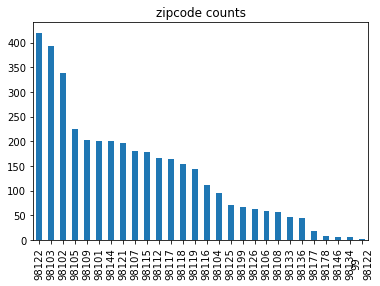

In [20]:
# Zipcode counts
disp_freq(listings_df, 'zipcode');


In [21]:
# Zipcode null counts
listings_df['zipcode'].isna().sum()

7

We can see clearly the tendency of zipcode. 

### Review

In [22]:
# Review related columns
review_cols = [col for col in listings_df.columns if 'review' in col]
listings_review_df = listings_df[review_cols]
listings_review_df

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89
...,...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.30
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# number_of_reviews
listings_review_df['number_of_reviews'].value_counts()

0      627
1      310
2      224
4      160
3      157
      ... 
244      1
270      1
278      1
294      1
353      1
Name: number_of_reviews, Length: 195, dtype: int64

Some rooms never have received a review. In this case, it is impossible to know the quiality of room or apartment.

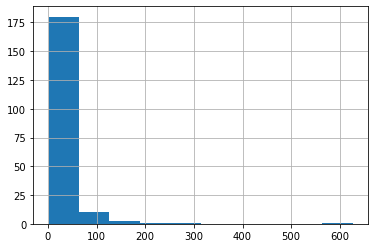

In [24]:
# Plot
listings_review_df['number_of_reviews'].value_counts().hist();

In [25]:
listings_review_description = listings_review_df['number_of_reviews'].describe().to_frame()

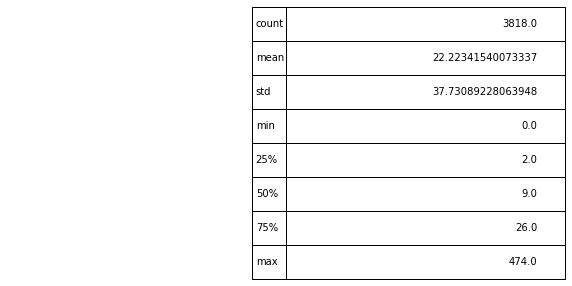

In [26]:
# Use for the blog post
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
ax.table(cellText = listings_review_description.values, rowLabels = listings_review_description.index, loc='center', bbox=[1,0,1,1]);

We can see that only a small portion of the hosts has many reviews.

In [27]:
# Review euals 10 or less
np.sum(listings_review_df['number_of_reviews'] < 11)

2049

In [28]:
# Review euals 5 or less
np.sum(listings_review_df['number_of_reviews'] < 6)

1599

In [29]:
# Review euals 3 or less
np.sum(listings_review_df['number_of_reviews'] < 4)

1318

How one can clean the number of reviews column ?
As the revieew scores are the mean of reviews, they may be biased if there are few reviews.

### Price and related columns

In [30]:
listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00
...,...,...,...,...,...
3813,$359.00,NaN,NaN,NaN,$230.00
3814,$79.00,NaN,NaN,$500.00,$50.00
3815,$93.00,$450.00,NaN,$250.00,$35.00
3816,$99.00,NaN,NaN,$300.00,$45.00


Note that they are treated as not numeric. So it needs to be fixed.

#### Change data type

In [31]:
# Change data type
listings_price_df = listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

for col in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    listings_price_df = pd.concat([listings_price_df.drop(columns = [col]), listings_price_df[col].str.replace('$','').str.replace(',','').astype(float)], axis = 1)
    
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,NaN,NaN,NaN,NaN
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,NaN,NaN,1000.0,300.0
3,100.0,650.0,2300.0,NaN,NaN
4,450.0,NaN,NaN,700.0,125.0


In [32]:
# NA counts
listings_price_df.isna().sum()/listings_price_df.shape[0]

price               0.000000
weekly_price        0.473808
monthly_price       0.602672
security_deposit    0.511262
cleaning_fee        0.269775
dtype: float64

Many rooms and apartments are not offered a long term price.   
Aproximately a half of the data requires a depossit and about a 27% of them charges a cleaning fee.

In [33]:
# calculate weekly and monthly prices
listings_price_df['calc_weekly_price'] = listings_price_df['price'] * 7
listings_price_df['calc_monthly_price'] = listings_price_df['price'] * 30
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,NaN,NaN,NaN,NaN,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,NaN,NaN,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,NaN,NaN,700.0,3000.0
4,450.0,NaN,NaN,700.0,125.0,3150.0,13500.0


In [34]:
# Fill missing values as 0
listings_price_df.fillna(0, inplace = True)
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,0.0,0.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,0.0,0.0,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,0.0,0.0,700.0,3000.0
4,450.0,0.0,0.0,700.0,125.0,3150.0,13500.0


In [35]:
# loop
for idx, row in listings_price_df.iterrows():
    if row['weekly_price'] == 0:
        listings_price_df.loc[idx, ['weekly_price']] = row['calc_weekly_price']
    if row['monthly_price'] == 0:
        listings_price_df.loc[idx, ['monthly_price']] = row['calc_monthly_price']

listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,0.0,0.0,700.0,3000.0
4,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0


In [36]:
# Drop calc_weekly_price and calc_monthly_price columns
listings_price_df = listings_price_df.drop(columns = ['calc_weekly_price', 'calc_monthly_price'])

In [37]:
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,595.0,2550.0,0.0,0.0
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,6825.0,29250.0,1000.0,300.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,3150.0,13500.0,700.0,125.0


#### security_deposit

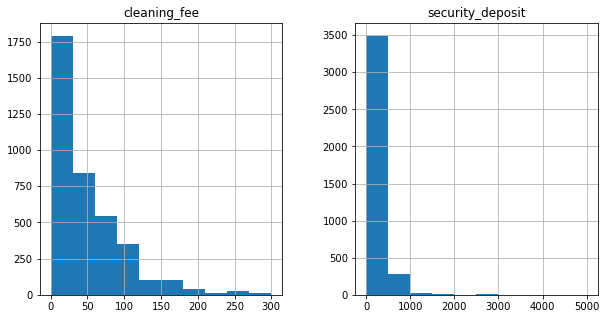

In [38]:
# security_deposit
listings_price_df[['security_deposit', 'cleaning_fee']].hist(figsize = (10, 5));

In [39]:
listings_price_df['security_deposit'].describe()

count    3818.000000
mean      140.566003
std       237.387534
min         0.000000
25%         0.000000
50%         0.000000
75%       200.000000
max      5000.000000
Name: security_deposit, dtype: float64

Maybe there are some very high values. 

#### Cleaning fee

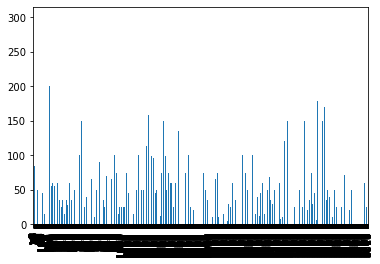

In [40]:
listings_price_df['cleaning_fee'].plot(kind='bar');

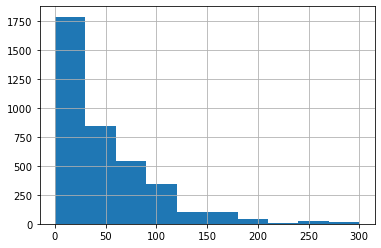

In [41]:
listings_price_df['cleaning_fee'].hist();

In [42]:
listings_price_df['cleaning_fee'].describe()

count    3818.000000
mean       45.062860
std        49.913798
min         0.000000
25%         0.000000
50%        30.000000
75%        65.000000
max       300.000000
Name: cleaning_fee, dtype: float64

It seems that the cleaning fee has a limit value which is $ 300. The variance is lower that deposit's one.

#### Correlation

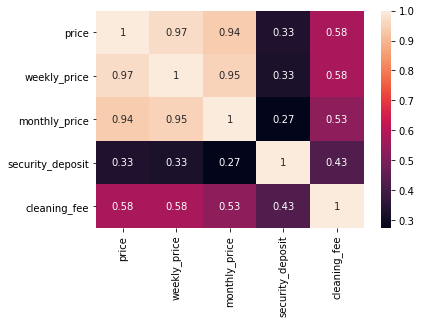

In [43]:
# Correlation
sns.heatmap(listings_price_df.corr(), annot = True);

Actuall price is price + cleaning fee

### Review scores

In [44]:
review_scores_cols = [col for col in listings_df.columns if 'review_scores' in col]
review_scores_df = listings_df[review_scores_cols]

Actually the means of review scores are high.

In [45]:
# Missing values
review_scores_df.isna().sum()

review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
dtype: int64

In [46]:
# drop na rows
review_scores_df = review_scores_df.dropna()
review_scores_df.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,94.538949,9.636795,9.556048,9.786574,9.810956,9.608930,9.452185
std,6.597547,0.697614,0.797442,0.595663,0.559464,0.628746,0.750099
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


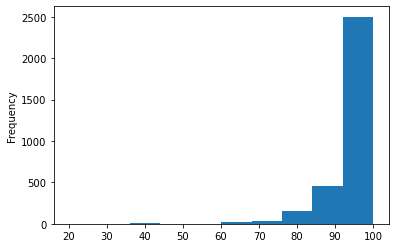

In [47]:
# review_scores_rating
review_scores_df['review_scores_rating'].plot(kind='hist');

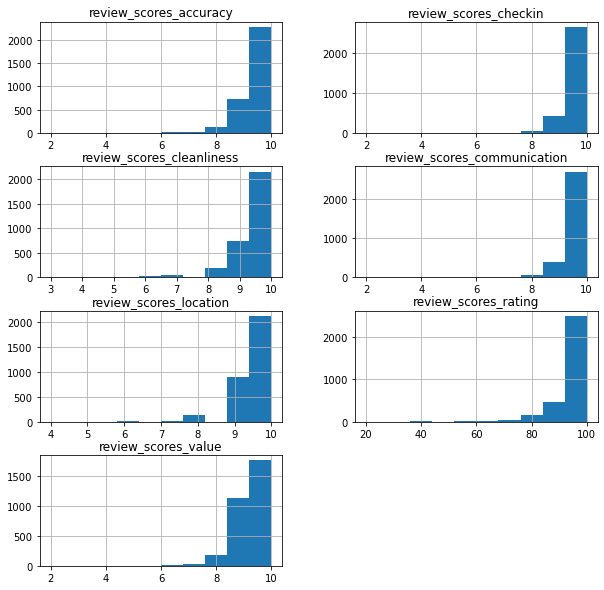

In [48]:
# Other scores
review_scores_df.hist(layout = [4,2], figsize = (10, 10), bins = 10);

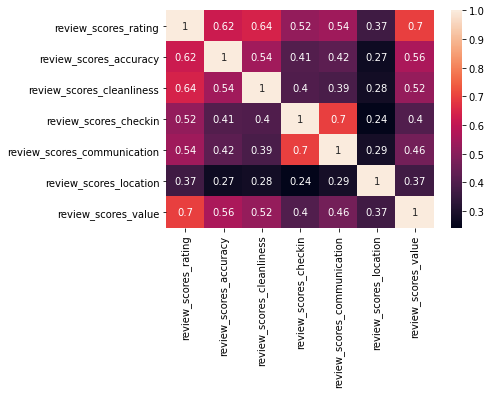

In [49]:
# Correlations
sns.heatmap(review_scores_df.corr(method ='pearson'), annot = True);

### Facilities (number of bathrooms, bedrooms, beds and accommodates)


In [50]:
facilities_df = listings_df[['bathrooms', 'bedrooms', 'beds', 'accommodates']]
facilities_df[:5]

,bathrooms,bedrooms,beds,accommodates
0,1.0,1.0,1.0,4
1,1.0,1.0,1.0,4
2,4.5,5.0,7.0,11
3,1.0,0.0,2.0,3
4,2.0,3.0,3.0,6


In [51]:
#Missing values
facilities_df.isna().sum()

bathrooms       16
bedrooms         6
beds             1
accommodates     0
dtype: int64

In [52]:
facilities_df[facilities_df.isna().any(axis=1)]

,bathrooms,bedrooms,beds,accommodates
1242,NaN,1.0,2.0,4
1314,NaN,1.0,2.0,4
1357,NaN,2.0,3.0,6
1378,NaN,1.0,1.0,4
1429,1.0,NaN,1.0,2
1492,1.0,NaN,1.0,6
1493,1.0,NaN,2.0,4
1853,1.0,NaN,1.0,2
1961,NaN,1.0,NaN,4
1975,NaN,1.0,1.0,1


The number of bedrooms should be at least one when there is beds. In some cases, bathrooms are not available.

#### Accomodates

In [53]:
listings_df['accommodates'].value_counts().sort_index()

1      256
2     1627
3      398
4      785
5      184
6      332
7       52
8      119
9       13
10      25
11       3
12      15
14       3
15       2
16       4
Name: accommodates, dtype: int64

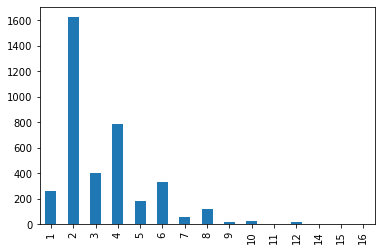

In [54]:
listings_df['accommodates'].value_counts().sort_index().plot(kind='bar');

### Facilities (type)

In [55]:
listings_df[['property_type','room_type','bed_type','amenities']][:5]

,property_type,room_type,bed_type,amenities
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [56]:
# NA counts
listings_df[['property_type','room_type','bed_type','amenities']].isna().sum()

property_type    1
room_type        0
bed_type         0
amenities        0
dtype: int64

In [57]:
# Na rows
(listings_df[['property_type','room_type','bed_type','amenities']])[listings_df[['property_type','room_type','bed_type','amenities']].isna().any(axis=1)]

,property_type,room_type,bed_type,amenities
2184,NaN,Entire home/apt,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ..."


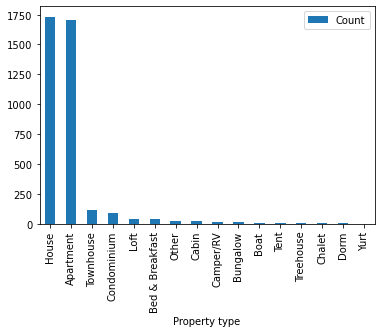

In [58]:
property_type_df = listings_df['property_type'].value_counts().reset_index()
property_type_df.columns = ['Property type','Count']
property_type_df.plot(x = 'Property type', y = 'Count', kind = 'bar');

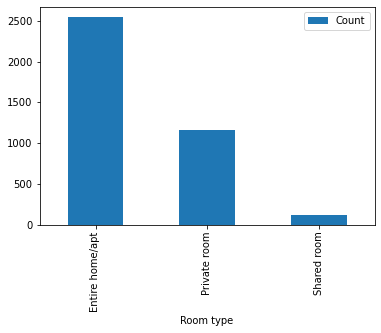

In [59]:
room_type_df = listings_df['room_type'].value_counts().reset_index()
room_type_df.columns = ['Room type','Count']
room_type_df.plot(x = 'Room type', y = 'Count', kind = 'bar');

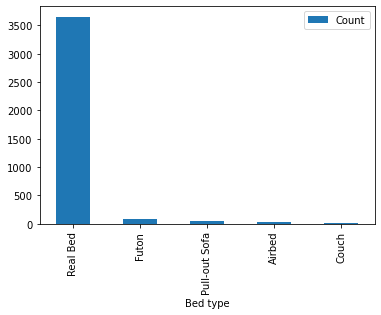

In [60]:
bed_type_df = listings_df['bed_type'].value_counts().reset_index()
bed_type_df.columns = ['Bed type','Count']
bed_type_df.plot(x = 'Bed type', y = 'Count', kind = 'bar');

### Amenities

In [61]:
# amenities
amenities_df = listings_df['amenities']
amenities_df[:5]

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [62]:
amenities_df.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

There are 45 rows where the amenities are empty. Drop these rows.

In [63]:
amenities_df = amenities_df[amenities_df != '{}']

In [64]:
amenities_list = []

for index, row in amenities_df.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

amenities_list[:3]


[['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer'],
 ['TV',
  'Internet',
  'Wireless Internet',
  'Kitchen',
  'Free Parking on Premises',
  'Buzzer/Wireless Intercom',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'First Aid Kit',
  'Safety Card',
  'Fire Extinguisher',
  'Essentials'],
 ['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Free Parking on Premises',
  'Pets Allowed',
  'Pets live on this property',
  'Dog(s)',
  'Cat(s)',
  'Hot Tub',
  'Indoor Fireplace',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'Essentials',
  'Shampoo']]

As each entry is a list, we need to somehow arrage this variable. One approch could be the one-hot encoding.

In [65]:
# Create a new ammenities df

new_amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()
new_amenities_df

,amenities
0,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
1,"[TV, Internet, Wireless Internet, Kitchen, Fre..."
2,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3,"[Internet, Wireless Internet, Kitchen, Indoor ..."
4,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
...,...
3768,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3769,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
3770,"[Cable TV, Wireless Internet, Kitchen, Free Pa..."
3771,"[TV, Wireless Internet, Kitchen, Free Parking ..."


In [66]:
# Modified the code from https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

dummies_amenities_df = new_amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(new_amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

dummies_amenities_df

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,1
3769,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3770,0,0,1,0,1,0,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1
3771,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [67]:
dummies_amenities_df.columns.values

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype=object)

In [68]:
dummies_amenities_df.sum()

24-Hour Check-in               616
Air Conditioning               677
Breakfast                      291
Buzzer/Wireless Intercom       538
Cable TV                      1446
Carbon Monoxide Detector      2485
Cat(s)                         382
Dog(s)                         509
Doorman                         85
Dryer                         2997
Elevator in Building           785
Essentials                    3237
Family/Kid Friendly           1963
Fire Extinguisher             2196
First Aid Kit                 1680
Free Parking on Premises      2167
Gym                            442
Hair Dryer                     774
Hangers                        846
Heating                       3627
Hot Tub                        303
Indoor Fireplace               886
Internet                      2811
Iron                           742
Kitchen                       3423
Laptop Friendly Workspace      745
Lock on Bedroom Door           100
Other pet(s)                    51
Pets Allowed        

In [69]:
# Wich row where Washer / Dryer is one
dummies_amenities_df[dummies_amenities_df['Washer / Dryer'] == 1]

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
2347,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,1
2971,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1


The column Washer / Dryer  can be deleted as only tow rows have this amenity. Besides, these particular rows have a washer which is duplicated.

In [70]:
dummies_amenities_df = dummies_amenities_df.drop(columns = ['Washer / Dryer'])

### Policies(cancellation_policy,require_guest_profile_picture and require_guest_phone_verification)

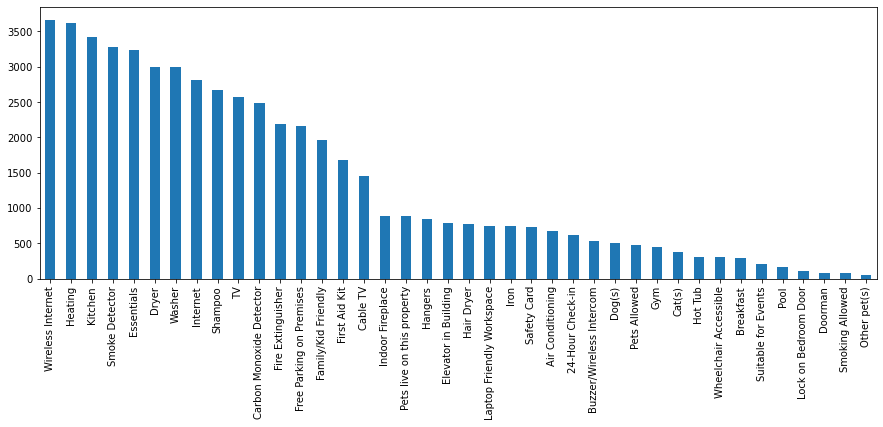

In [71]:
dummies_amenities_df.sum().sort_values(ascending = False).plot(kind='bar', figsize = (15,5));

In [72]:
policies_df = listings_df[['cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']]

policies_df[:5]

,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,moderate,f,f
1,strict,t,t
2,strict,f,f
3,flexible,f,f
4,strict,f,f


In [73]:
# cancellation policy

policies_df['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [74]:
policies_df['require_guest_profile_picture'].value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [75]:
policies_df['require_guest_phone_verification'].value_counts()

f    3443
t     375
Name: require_guest_phone_verification, dtype: int64

In [76]:
# cancellation_policy dummy df
pd.get_dummies(policies_df['cancellation_policy'], prefix='cancellation_policy')[:5]

,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


## Calender data

In [77]:
# See first 5 rows
calender_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [78]:
# data types
calender_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

Some data formats seem to be incorrect.

In [79]:
# Null counts

calender_df.isna().sum()/calender_df.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [80]:
# available variable counts

calender_df['available'].value_counts()/calender_df.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

The proportion of f is matched with null of price variable. This means that when a room or apartment is unavailable, the price is not registered.   


In [81]:
# listing_id counts
calender_df['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64

In [82]:
# Unique listing_id
calender_df['listing_id'].value_counts().shape[0]

3818

Some conclusions

* There are 3818 room or apartment price data for 365 days. 

This flat horzontal means that all the dates apper equally in this data set.

In [83]:
# Number of date unique values
calender_df['date'].value_counts().shape[0]

365

Then we can order date variable to see tendencies in month, weekdays, etc. 

In [84]:
# Date variable counts
calender_df['price'].value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
           ...  
$501.00        1
$637.00        1
$566.00        1
$686.00        1
$562.00        1
Name: price, Length: 669, dtype: int64

As the price column has many missing value, we need to see how to impute it. Besides, it needs to be changed the data type as the price variable should be countinuous. 

# Data preparation

## Listings

* Select only the columns which we are interested in
* Drop rows with missing values of the number of reviews
* Drop rows with missing values of the review socres
* Drop rows with missing values of the bathrooms
* Drop rows with missing values of the property type
* Drop rows where the number of reviews is 0.
* Drop rows where the amenities are empty
* Fill missing values of the bedrooms and beds as 1
* Change the data type of the price and related columns and fill missing values as 0
* Calculate weekly and monthly prices if they are not available
* Create dummy columns of cancellation policy, room type, property type and bed type
* Create dummy columns based on the ammenities


### Select only the columns which we are interested in

In [85]:
#Select only the columns which we are interested in

selected_listings_cols = [
    'id',
#  'listing_url',
#  'scrape_id',
#  'last_scraped',
#  'name',
#  'summary',
#  'space',
#  'description',
#  'experiences_offered',
#  'neighborhood_overview',
#  'notes',
#  'transit',
#  'thumbnail_url',
#  'medium_url',
#  'picture_url',
#  'xl_picture_url',
#  'host_id',
#  'host_url',
#  'host_name',
#  'host_since',
#  'host_location',
#  'host_about',
#  'host_response_time',
#  'host_response_rate',
#  'host_acceptance_rate',
#  'host_is_superhost',
#  'host_thumbnail_url',
#  'host_picture_url',
#  'host_neighbourhood',
#  'host_listings_count',
#  'host_total_listings_count',
#  'host_verifications',
#  'host_has_profile_pic',
#  'host_identity_verified',
#  'street',
#  'neighbourhood',
#  'neighbourhood_cleansed',
#  'neighbourhood_group_cleansed',
#  'city',
#  'state',
 'zipcode',
#  'market',
#  'smart_location',
#  'country_code',
#  'country',
#  'latitude',
#  'longitude',
#  'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
#  'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
#  'guests_included',
#  'extra_people',
#  'minimum_nights',
#  'maximum_nights',
#  'calendar_updated',
#  'has_availability',
#  'availability_30',
#  'availability_60',
#  'availability_90',
#  'availability_365',
#  'calendar_last_scraped',
 'number_of_reviews',
#  'first_review',
#  'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
#  'requires_license',
#  'license',
#  'jurisdiction_names',
#  'instant_bookable',
 'cancellation_policy',
#  'require_guest_profile_picture',
#  'require_guest_phone_verification',
#  'calculated_host_listings_count',
#  'reviews_per_month'
]

new_listings_df = listings_df[selected_listings_cols]
new_listings_df[:5]

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
1,953595,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,$40.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
2,3308979,98119,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,$300.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
3,7421966,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
4,278830,98119,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",...,$125.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict


### Drop unnecesary columns

In [86]:
# Drop rows with missing values of the number of reviews
# Drop rows with missing values of the bathrooms
# Drop rows with missing values of the property type

review_scores_cols = [col for col in listings_df.columns if 'review_scores' in col]
drop_cols = ['number_of_reviews','bathrooms','property_type'] + review_scores_cols

new_listings_df.dropna(subset = drop_cols, axis = 0, inplace = True)

# Drop rows where the number of reviews is 0.
new_listings_df = new_listings_df[new_listings_df['number_of_reviews'] != 0]

# Drop rows where the amenities are empty
new_listings_df = new_listings_df[new_listings_df['amenities'] != '{}']

# Reset index
new_listings_df = new_listings_df.reset_index(drop = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Fill missing values

In [87]:
# Fill missing values of the bedrooms and beds as 1
new_listings_df[['bedrooms', 'beds']] = new_listings_df[['bedrooms', 'beds']].fillna(value = 1)

In [88]:
# Change the data type of the price and related columns and fill missing values as 0
new_listings_price_df = new_listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

for col in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    new_listings_price_df = pd.concat([new_listings_price_df.drop(columns = [col]), new_listings_price_df[col].str.replace('$','').str.replace(',','').astype(float)], axis = 1)
    
new_listings_price_df.fillna(value = 0, inplace =True)

In [89]:
# Calculate weekly and monthly price
new_listings_price_df['calc_weekly_price'] = new_listings_price_df['price'] * 7
new_listings_price_df['calc_monthly_price'] = new_listings_price_df['price'] * 30
new_listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,0.0,0.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,0.0,0.0,1000.0,300.0,6825.0,29250.0
3,450.0,0.0,0.0,700.0,125.0,3150.0,13500.0
4,120.0,800.0,0.0,0.0,40.0,840.0,3600.0


In [90]:
# Fill the weekly and monthky price by its calculated values
for idx, row in new_listings_price_df.iterrows():
    if row['weekly_price'] == 0:
        new_listings_price_df.loc[idx, ['weekly_price']] = row['calc_weekly_price']
    if row['monthly_price'] == 0:
        new_listings_price_df.loc[idx, ['monthly_price']] = row['calc_monthly_price']

new_listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1000.0,300.0,6825.0,29250.0
3,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0
4,120.0,800.0,3600.0,0.0,40.0,840.0,3600.0


In [91]:
# Drop calculated weekly and monthly price columns
new_listings_price_df.drop(columns = ['calc_weekly_price', 'calc_monthly_price'], inplace = True)

# # Reset index
# new_listings_price_df = new_listings_price_df.reset_index(drop=True)

### Dummy columns

#### cancellation policy, room type, property type and bed type

In [92]:
# Create dummy columns of cancellation policy, room type, property type and bed type

cancellation_policy_dummy_df = pd.get_dummies(new_listings_df['cancellation_policy'], prefix = 'cancellation_policy')
room_type_dummy_df = pd.get_dummies(new_listings_df['room_type'], prefix = 'room_type')
property_type_dummy_df = pd.get_dummies(new_listings_df['property_type'], prefix = 'property_type')
bed_type_dummy_df = pd.get_dummies(new_listings_df['bed_type'], prefix = 'bed_type')
bed_type_dummy_df

,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
3118,0,0,0,0,1
3119,0,0,0,0,1
3120,0,0,0,0,1
3121,0,0,0,0,1


#### Amenities

In [93]:
# Create dummy columns based on the ammenities

# Drop rows with empty rows
amenities_series = new_listings_df['amenities']
amenities_series = amenities_series[amenities_series != '{}']

# Iterate over rows and format them as list
amenities_list = []

for index, row in amenities_series.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

# Convert the list to a data frame
amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()

# Create a dummy data frame
dummies_amenities_df = amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

# Reset index
# dummies_amenities_df = dummies_amenities_df.reset_index(drop=True)
dummies_amenities_df[:5]

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


#### Concatenate all dummy data

In [94]:
dummy_df = pd.concat([cancellation_policy_dummy_df, room_type_dummy_df, property_type_dummy_df, bed_type_dummy_df, dummies_amenities_df], axis = 1)
dummy_df[:5]

,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


### Update new listings df

In [95]:
# Numeric columns
new_listings_df.select_dtypes(include = ['int', 'float'])

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,4,1.0,1.0,1.0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,4,1.0,1.0,1.0,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,11,4.5,5.0,7.0,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,278830,6,2.0,3.0,3.0,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0
4,5956968,2,1.0,1.0,1.0,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,262764,5,1.0,2.0,3.0,5,92.0,9.0,8.0,10.0,10.0,10.0,8.0
3119,8578490,3,1.0,1.0,1.0,2,100.0,9.0,8.0,10.0,10.0,10.0,10.0
3120,3383329,4,1.0,1.0,2.0,73,96.0,10.0,10.0,10.0,10.0,9.0,10.0
3121,8101950,6,2.0,3.0,3.0,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0


In [96]:
concat_listings_df = pd.concat([new_listings_df.select_dtypes(include = ['int', 'float']), new_listings_price_df, dummy_df], axis = 1)

In [97]:
concat_listings_df[:5]

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,241032,4,1.0,1.0,1.0,207,95.0,10.0,10.0,10.0,...,0,0,0,0,0,1,1,0,0,1
1,953595,4,1.0,1.0,1.0,43,96.0,10.0,10.0,10.0,...,1,0,1,0,0,1,1,0,0,1
2,3308979,11,4.5,5.0,7.0,20,97.0,10.0,10.0,10.0,...,0,1,1,0,0,1,1,0,0,1
3,278830,6,2.0,3.0,3.0,38,92.0,9.0,9.0,10.0,...,0,1,1,0,0,1,0,0,0,1
4,5956968,2,1.0,1.0,1.0,17,95.0,10.0,10.0,10.0,...,0,1,1,0,0,0,0,0,0,1


In [98]:
# Check missing values
concat_listings_df.isna().sum().sum()

0

## Calender

* Change date variable as date format
* Chnage price variable as float type



In [99]:
# Copy the original data set
new_calender_df = calender_df.copy()
new_calender_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [100]:
# Change data types
new_calender_df['date'] = pd.to_datetime(new_calender_df['date']) 
new_calender_df['price'] = new_calender_df['price'].str.replace('$','').str.replace(',','').astype(float)
new_calender_df['available'] = new_calender_df['available'].replace({'t': True, 'f': False})
new_calender_df

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN
1393566,10208623,2016-12-30,False,NaN
1393567,10208623,2016-12-31,False,NaN
1393568,10208623,2017-01-01,False,NaN


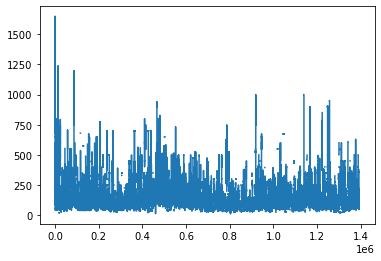

In [101]:
# Plot price data
new_calender_df['price'].plot();

This plot is actually not meaningful.

In [102]:
# Na counts by id
new_calender_df.groupby('listing_id')['available'].sum()

listing_id
3335        309.0
4291        365.0
5682        309.0
6606        365.0
7369         53.0
            ...  
10332096    365.0
10334184    361.0
10339144      0.0
10339145    365.0
10340165    358.0
Name: available, Length: 3818, dtype: float64

In [103]:
new_calender_df.groupby('listing_id')['available'].sum().max()

365.0

In [104]:
# How many rooms or apartments are never available ?
np.sum(new_calender_df.groupby('listing_id')['available'].sum() == 0)

95

These rows should be deleted as they never provide the price information. 

In [105]:
# Filter out never available listing_id
listing_id_available_count = new_calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x != 0]

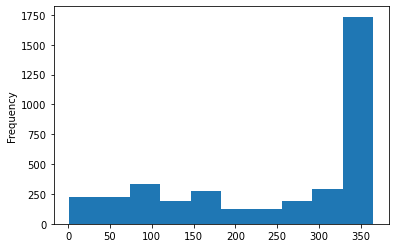

In [106]:
listing_id_available_count.plot(kind='hist');

In [107]:
# Number of always available listing_id
listing_id_available_count[listing_id_available_count == 365].count()

678

We can see that most of rooms and apartmants are available for the entire periods of the data

Data cleaning

* Delete rows of listing_id which never provide the price information
* Create columns of year, month and day


In [108]:
# Create a list which contains always non available listing_id
always_f_listing_id = list(new_calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x == 0].index.values)

In [109]:
# Drop these rows
clean_calender_df = new_calender_df[~new_calender_df['listing_id'].isin(always_f_listing_id)]
np.sum(clean_calender_df.groupby('listing_id')['available'].sum() == 0)

0

In [110]:
# Create new columns
clean_calender_df['day'] = clean_calender_df['date'].dt.day
clean_calender_df['month'] = clean_calender_df['date'].dt.month
clean_calender_df['year'] = clean_calender_df['date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [111]:
# Take a look at the cleaned data
clean_calender_df[:5]

,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,True,85.0,4,1,2016
1,241032,2016-01-05,True,85.0,5,1,2016
2,241032,2016-01-06,False,NaN,6,1,2016
3,241032,2016-01-07,False,NaN,7,1,2016
4,241032,2016-01-08,False,NaN,8,1,2016


In [112]:
# Check missing values
clean_calender_df.isna().sum()

listing_id         0
date               0
available          0
price         424353
day                0
month              0
year               0
dtype: int64

# Data model

## Predict price

Data
* Use concat_listings_df
* clean_calender_df

In [113]:
# Use concat_listings_df
list(concat_listings_df.columns.values)

['id',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type

In [114]:
# Data preparation 

selected_cols = [
#     'id',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
#  'number_of_reviews',
#  'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
#  'review_scores_value',
#  'price',
#  'weekly_price',
#  'monthly_price',
#  'security_deposit',
#  'cleaning_fee',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
#  'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'
                ]

# Exclude related columns and id
X = concat_listings_df[selected_cols]

y = concat_listings_df['price']

In [115]:
# Import required packages
from scipy.stats import uniform, randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [116]:
# Train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99) 

In [117]:
# Fit 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [118]:

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train) 

# r2 score
train_score = r2_score(y_train, y_train_preds)
test_score =  r2_score(y_test, y_test_preds)
print(train_score, test_score)

0.5918490266234647 -2.396139212348817e+17


This is actually overfitted 

### Xgboost

from https://www.kaggle.com/kwatanwa/future-sales-predict-xgboost-and-rf/notebook

In [119]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [120]:
# Train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99) 

In [121]:
# Create a model and fit the data to it 

xgb_model = XGBRegressor(
    max_depth=15,
    n_estimators=100,
    min_child_weight=10, 
    colsample_bytree=0.6, 
    subsample=0.6, 
    eta=0.2,    
    seed=0,
    learning_rate = 0.1,
    n_jobs=-1)

xgb_model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=10, 
    early_stopping_rounds = 10)


[0]	validation_0-rmse:143.24442	validation_1-rmse:140.92087
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[10]	validation_0-rmse:73.75077	validation_1-rmse:73.64956
[20]	validation_0-rmse:55.25566	validation_1-rmse:58.41210
[30]	validation_0-rmse:49.10986	validation_1-rmse:55.47543
[40]	validation_0-rmse:46.09318	validation_1-rmse:54.69885
[50]	validation_0-rmse:43.70401	validation_1-rmse:54.83313
Stopping. Best iteration:
[40]	validation_0-rmse:46.09318	validation_1-rmse:54.69885



XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

In [122]:
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_test_pred = xgb_model.predict(X_test)


In [123]:
for i in [[y_train, xgb_train_pred], [y_val, xgb_val_pred], [y_test, xgb_test_pred]]:
    print(r2_score(i[0], i[1]))

0.7463700701237557
0.5928163026737583
0.5403780569462546


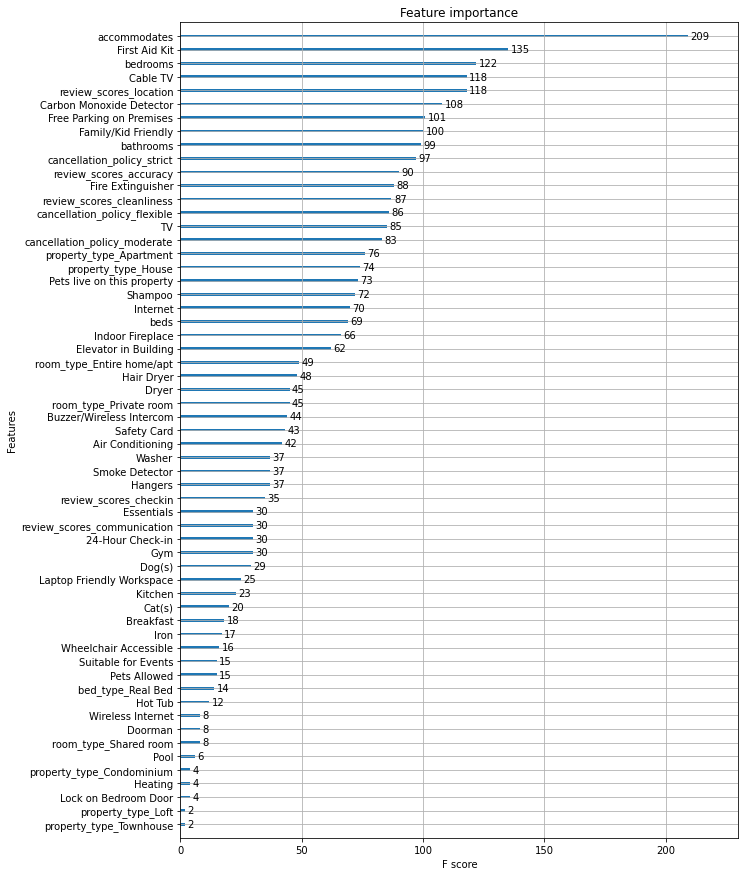

In [124]:
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(xgb_model,ax=ax);

### Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [127]:
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)

In [128]:
for i in [[y_train, rf_train_pred], [y_val, rf_val_pred], [y_test, rf_test_pred]]:
    print(r2_score(i[0], i[1]))

0.8087142465249612
0.5685085229272628
0.5347090327126174


### Ensamble

In [129]:
first_level = pd.DataFrame(xgb_val_pred, columns=["xgb"])
first_level["rf"] = rf_val_pred
first_level.info()

first_level_test = pd.DataFrame(xgb_test_pred, columns=["xgb"])
first_level_test["rf"] = rf_test_pred
first_level_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xgb     438 non-null    float32
 1   rf      438 non-null    float64
dtypes: float32(1), float64(1)
memory usage: 5.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xgb     937 non-null    float32
 1   rf      937 non-null    float64
dtypes: float32(1), float64(1)
memory usage: 11.1 KB


In [130]:
meta_model = LinearRegression(n_jobs=-1)
meta_model.fit(first_level, y_val)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [131]:
test_prediction = meta_model.predict(first_level_test)

In [132]:
r2_score(y_test, test_prediction)

0.5499273724233322

# Data visualization

Availibity through the entire period and price tendency

Data
* Use concat_listings_df
* clean_calender_df

In [133]:
clean_calender_df[:5]

,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,True,85.0,4,1,2016
1,241032,2016-01-05,True,85.0,5,1,2016
2,241032,2016-01-06,False,NaN,6,1,2016
3,241032,2016-01-07,False,NaN,7,1,2016
4,241032,2016-01-08,False,NaN,8,1,2016


In [134]:
# Add zip code
# concat_listings_df['zipcode']

### Available days

In [135]:
count_calender_df = clean_calender_df.groupby(['listing_id', 'year', 'month']).sum()['available'].reset_index()

In [136]:
count_calender_df['listing_id'] = count_calender_df.listing_id.astype(str)


In [137]:
count_calender_df[:20]

,listing_id,year,month,available
0,3335,2016,1,0.0
1,3335,2016,2,1.0
2,3335,2016,3,31.0
3,3335,2016,4,30.0
4,3335,2016,5,31.0
5,3335,2016,6,30.0
6,3335,2016,7,31.0
7,3335,2016,8,31.0
8,3335,2016,9,30.0
9,3335,2016,10,31.0


In [138]:
#  Drop data of 2017
count_calender_df = count_calender_df[count_calender_df['year'] != 2017]

# Drop the year column
count_calender_df = count_calender_df.drop(columns = ['year'])

### Availability by month

In [139]:
max_month_availability = count_calender_df.groupby('month').max()['available']

In [140]:
max_month_availability

month
1     28.0
2     29.0
3     31.0
4     30.0
5     31.0
6     30.0
7     31.0
8     31.0
9     30.0
10    31.0
11    30.0
12    31.0
Name: available, dtype: float64

In [141]:
# Create a new column
count_calender_df['is_available'] = count_calender_df['available'] != 0

In [142]:
# Count the number of available rooms and apartments by month

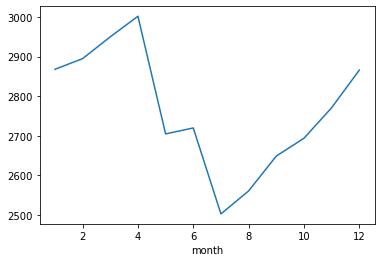

In [143]:
count_calender_df.groupby('month').sum()['is_available'].plot();

### Price tendency

In [144]:
# Only take rows where the available is True

price_tendency_df = clean_calender_df[clean_calender_df['available'] == True]

In [145]:
#  Drop data of 2017
price_tendency_df = price_tendency_df[price_tendency_df['year'] != 2017]

# Drop the year column
price_tendency_df = price_tendency_df.drop(columns = ['year'])

In [146]:
# Group by month
month_tendency_df = price_tendency_df.groupby('month').agg({"price": ["mean", 'median', 'min', 'max', 'std']}).reset_index(level=0)


In [147]:
month_tendency_df

month       price                                 
                mean median   min     max         std
0      1  121.568409   99.0  12.0  1000.0   86.900024
1      2  124.293927  100.0  20.0  1000.0   91.550076
2      3  128.644488  100.0  20.0  1099.0   94.371410
3      4  135.097005  110.0  20.0  1099.0   98.232098
4      5  139.538183  110.0  20.0  1099.0  102.863280
5      6  147.473137  110.0  20.0  1099.0  112.481803
6      7  152.094150  115.0  20.0  1240.0  120.078098
7      8  150.656594  114.0  20.0  1250.0  118.754189
8      9  143.255949  110.0  20.0  1450.0  108.804290
9     10  137.031939  109.0  20.0  1650.0  104.491505
10    11  135.688738  106.0  10.0  1650.0  104.264654
11    12  137.251835  109.0  20.0  1650.0  105.101659

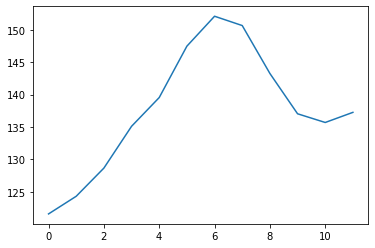

In [148]:
month_tendency_df['price']['mean'].plot();

# Conclusions 

* Price prediction: difficult to predict using simple models, more sofisticated models are needed.

* Availability and Price
In the summer the mean price is the highest while the availability is the lowest


Things that can do...

* Availability: it may depend on the room an house type

* Price depend it may depend on the room an house type

* There are possible outliers.